In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2
from imblearn.over_sampling import SMOTENC
import category_encoders as ce

# what is my main aim?
The objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). 
Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.



In [ ]:
#what factors affect a term deposit

In [3]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#finding the data type, column names and total not null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df= df.rename(columns={'y':'Suscribed'})

In [7]:
#Checking for duplicates
df.duplicated().sum()

12

In [8]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
#checking for duplicates after removing them
df.duplicated().sum()

0

In [10]:
#checking for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Suscribed         0
dtype: int64

In [11]:
#finding a summary statistic of  all categorical variables
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Suscribed
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [12]:
object_cols = df.select_dtypes(include='object')

In [13]:
#checking for values of categorical variables to ensure consistency
for col in object_cols:
    print(col+ '\n')
    print(df[col].unique())

job

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital

['married' 'single' 'divorced' 'unknown']
education

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default

['no' 'unknown' 'yes']
housing

['no' 'yes' 'unknown']
loan

['no' 'yes' 'unknown']
contact

['telephone' 'cellular']
month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week

['mon' 'tue' 'wed' 'thu' 'fri']
poutcome

['nonexistent' 'failure' 'success']
Suscribed

['no' 'yes']


In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
numeric_cols = df.select_dtypes(include='number')

In [16]:
list_of_num_cols =numeric_cols.columns.tolist()

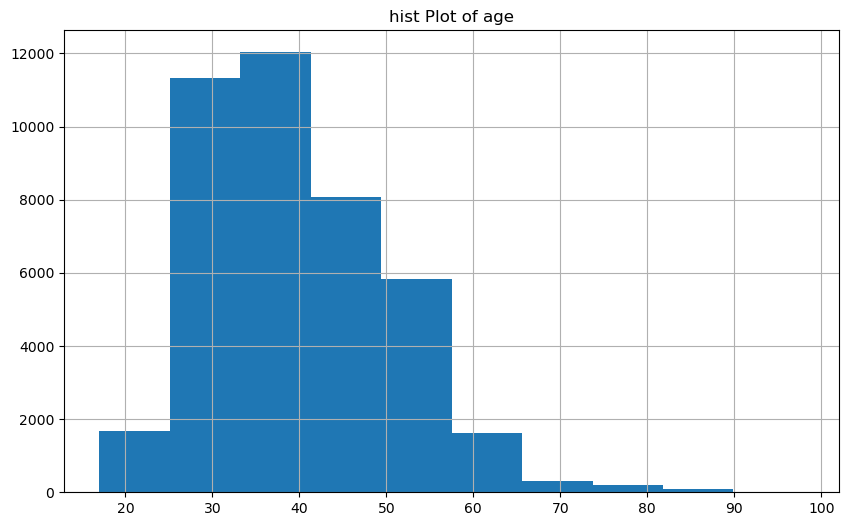

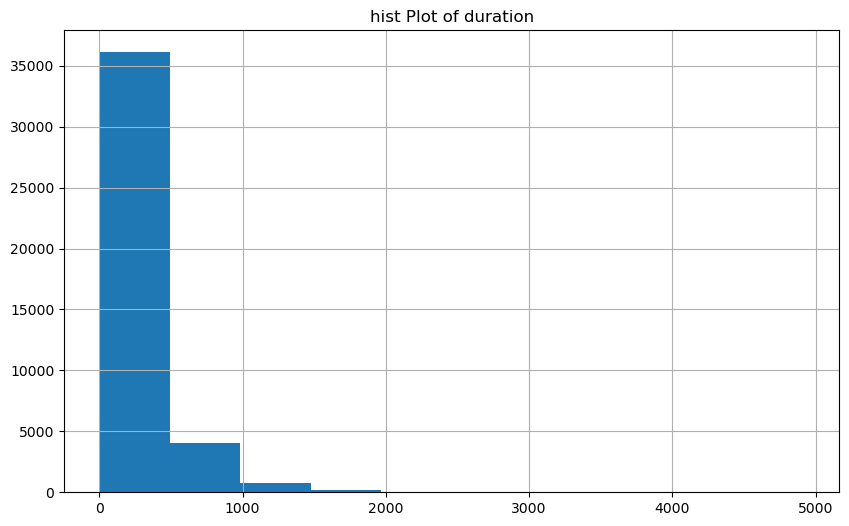

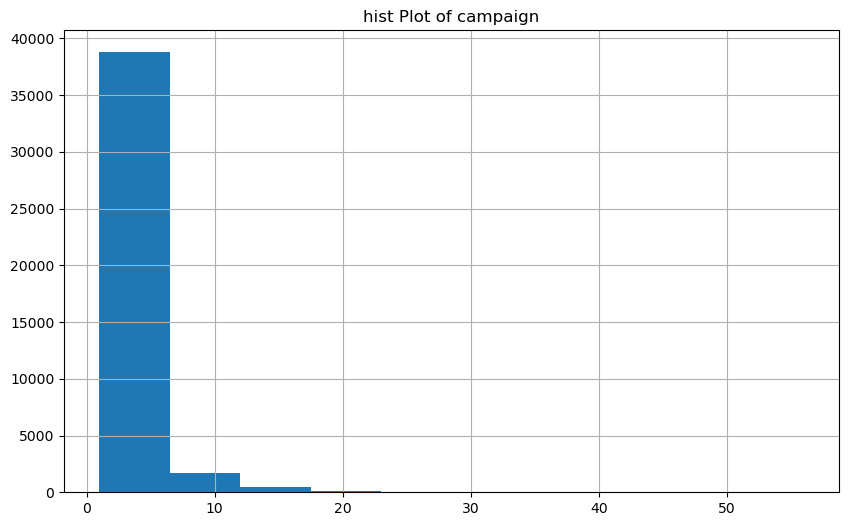

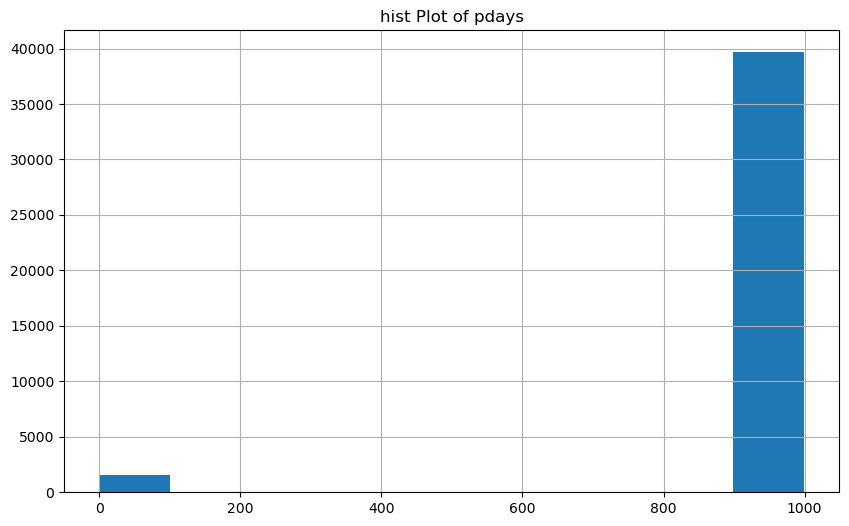

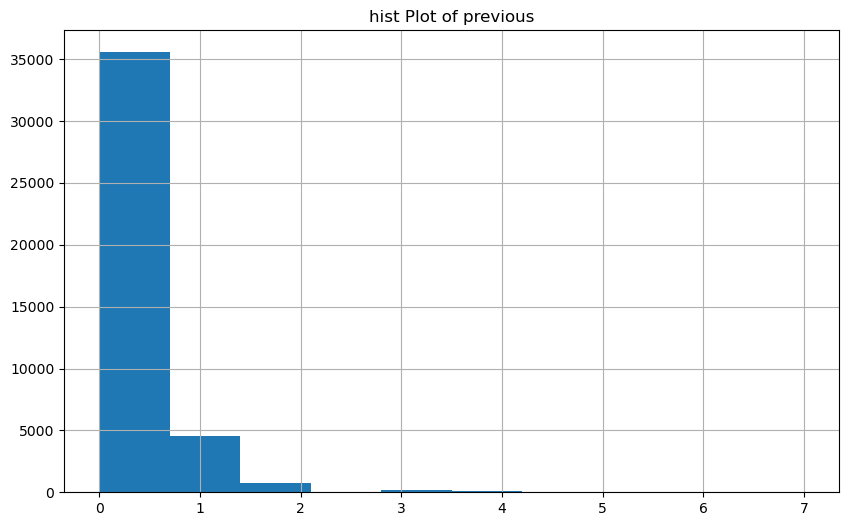

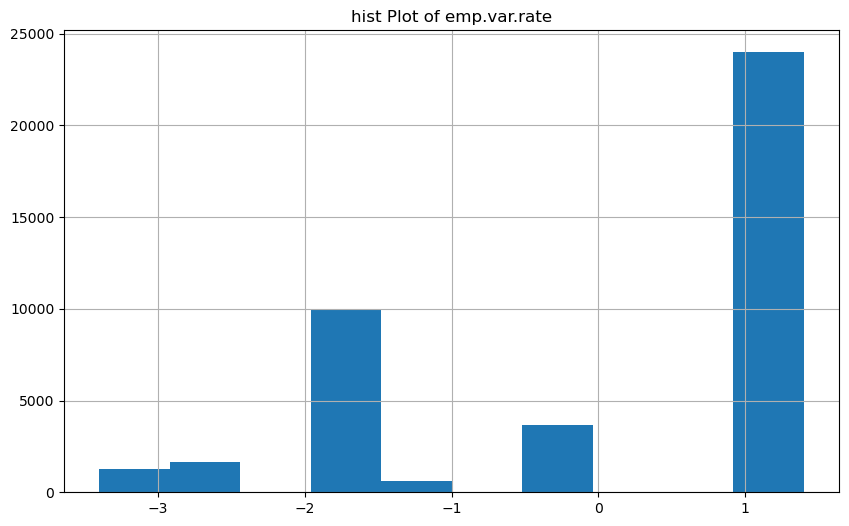

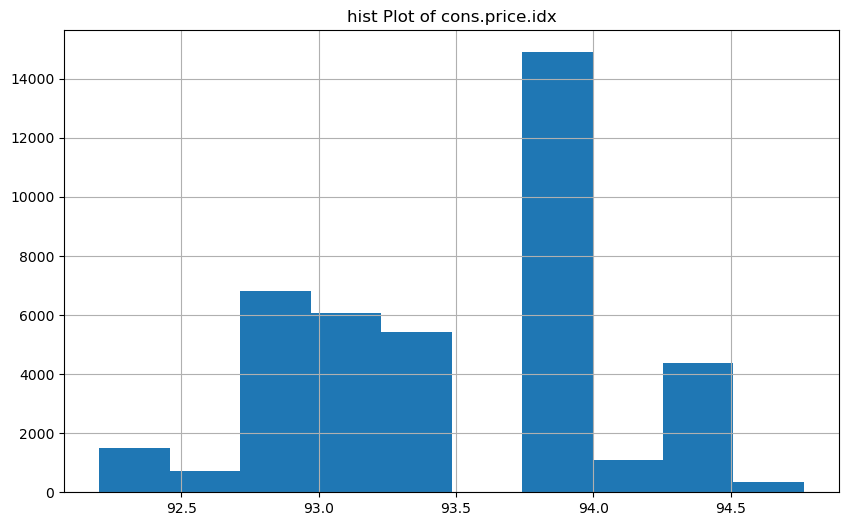

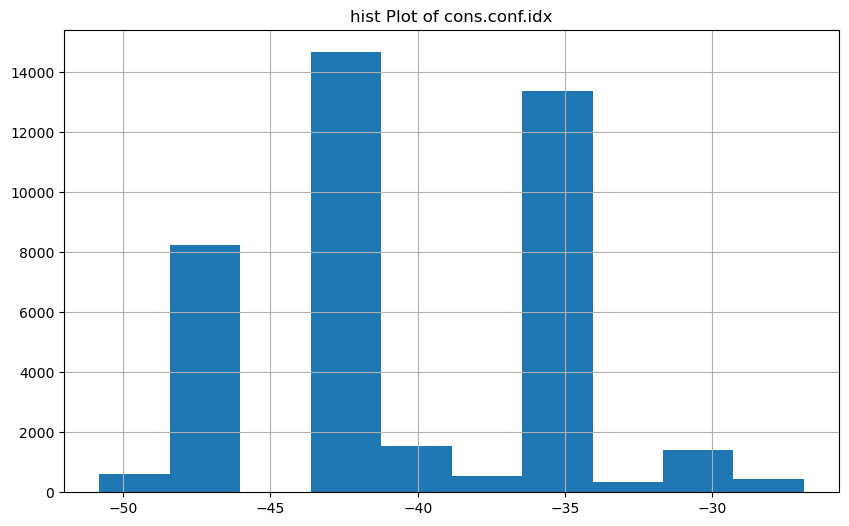

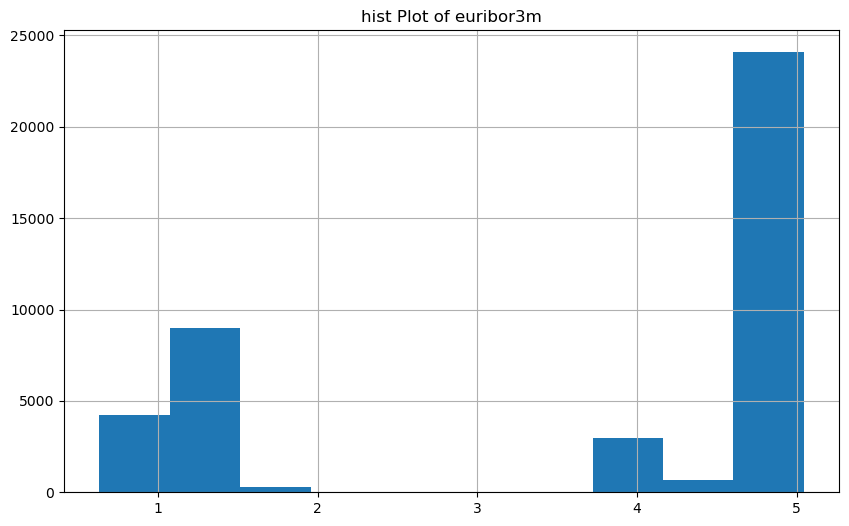

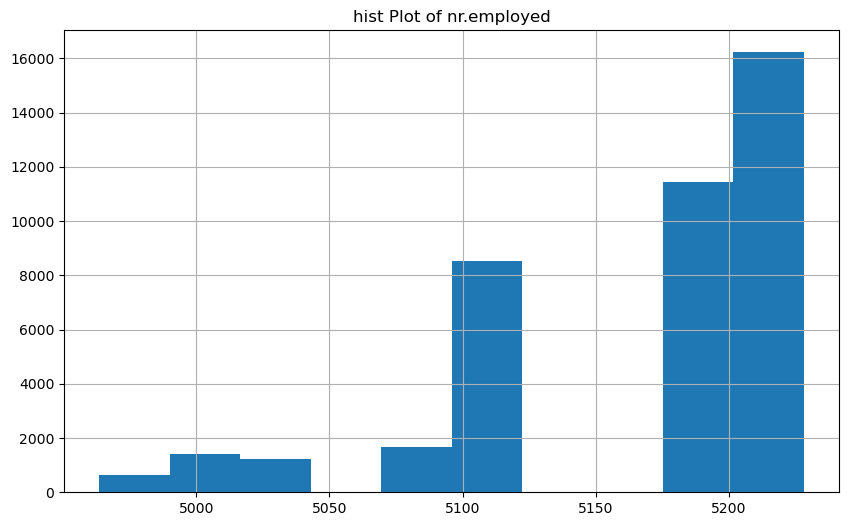

In [17]:
for column in numeric_cols:
    plt.figure(figsize=(10,6))
    plt.title(f'hist Plot of {column}')
    df[column].hist()

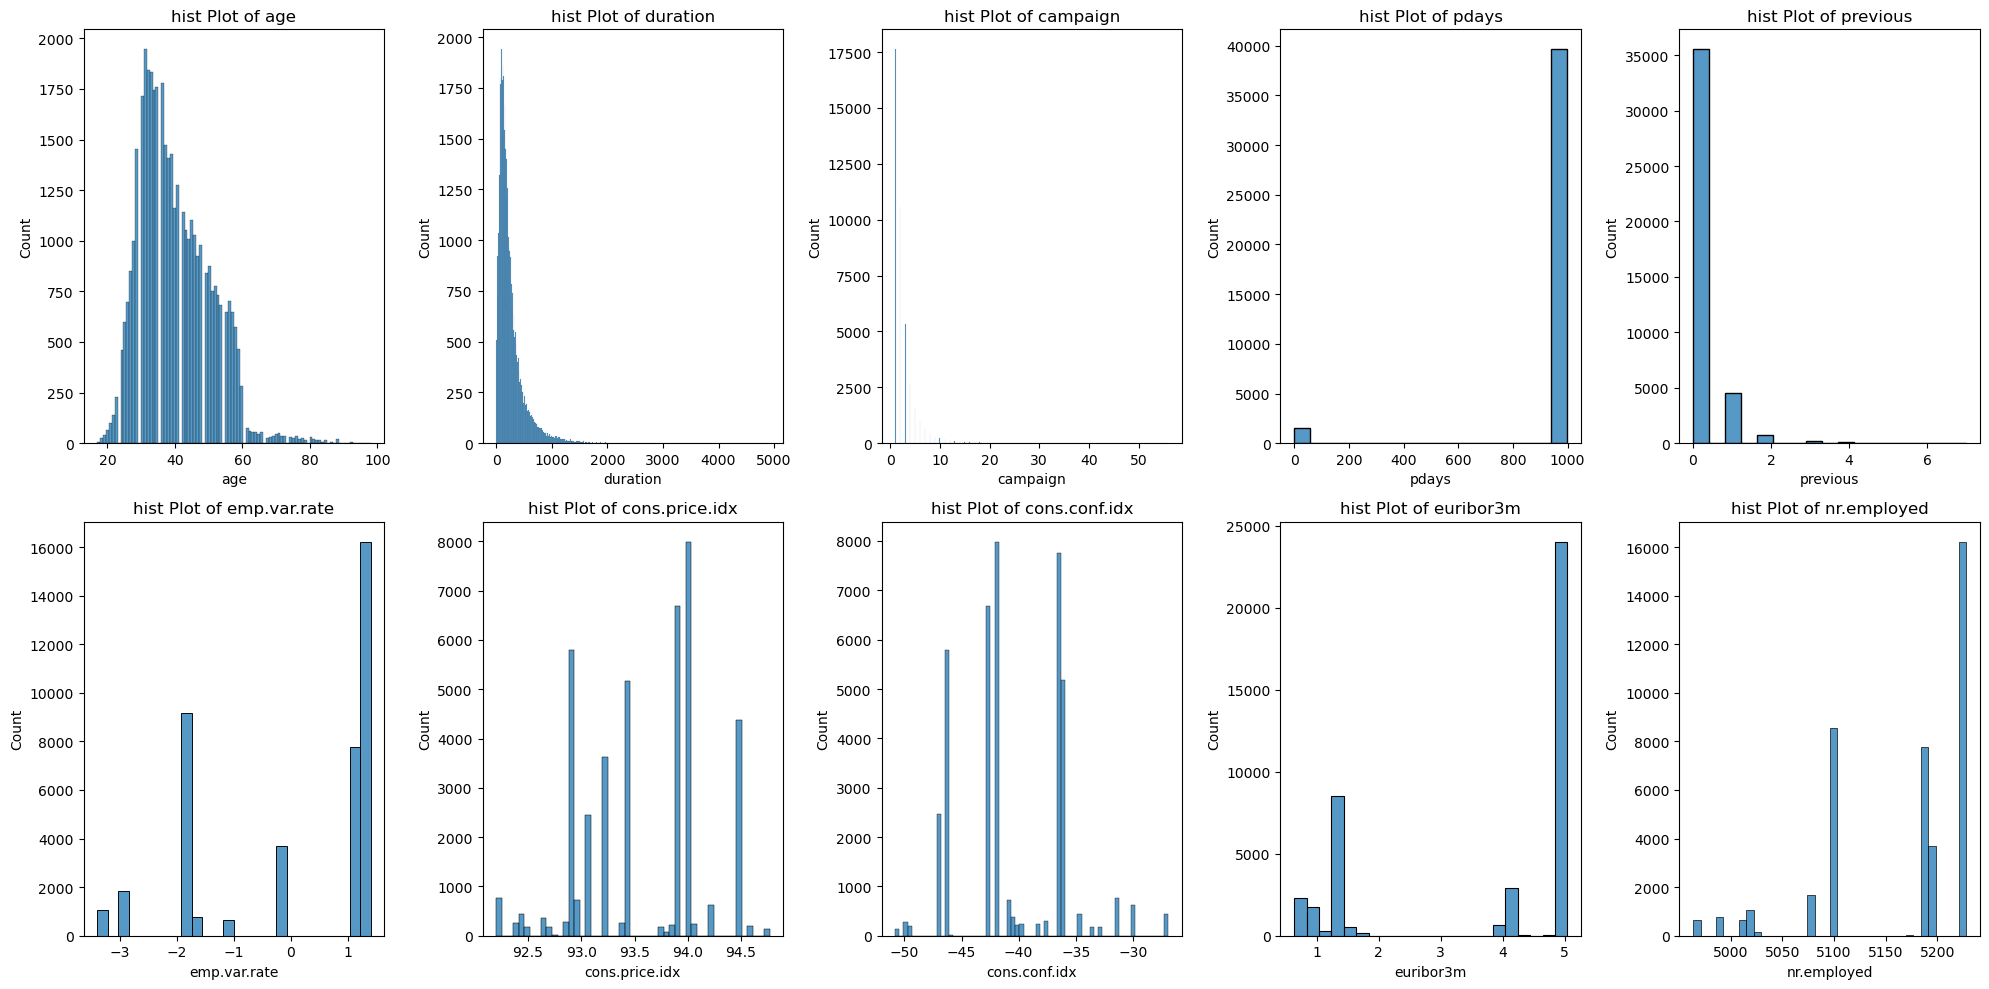

In [18]:
fig,axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()
for i,column in enumerate(list_of_num_cols):
    sns.histplot(data=df,x=column,ax=axes[i])
    
    axes[i].set_title(f'hist Plot of {column}')
plt.tight_layout()
plt.show()

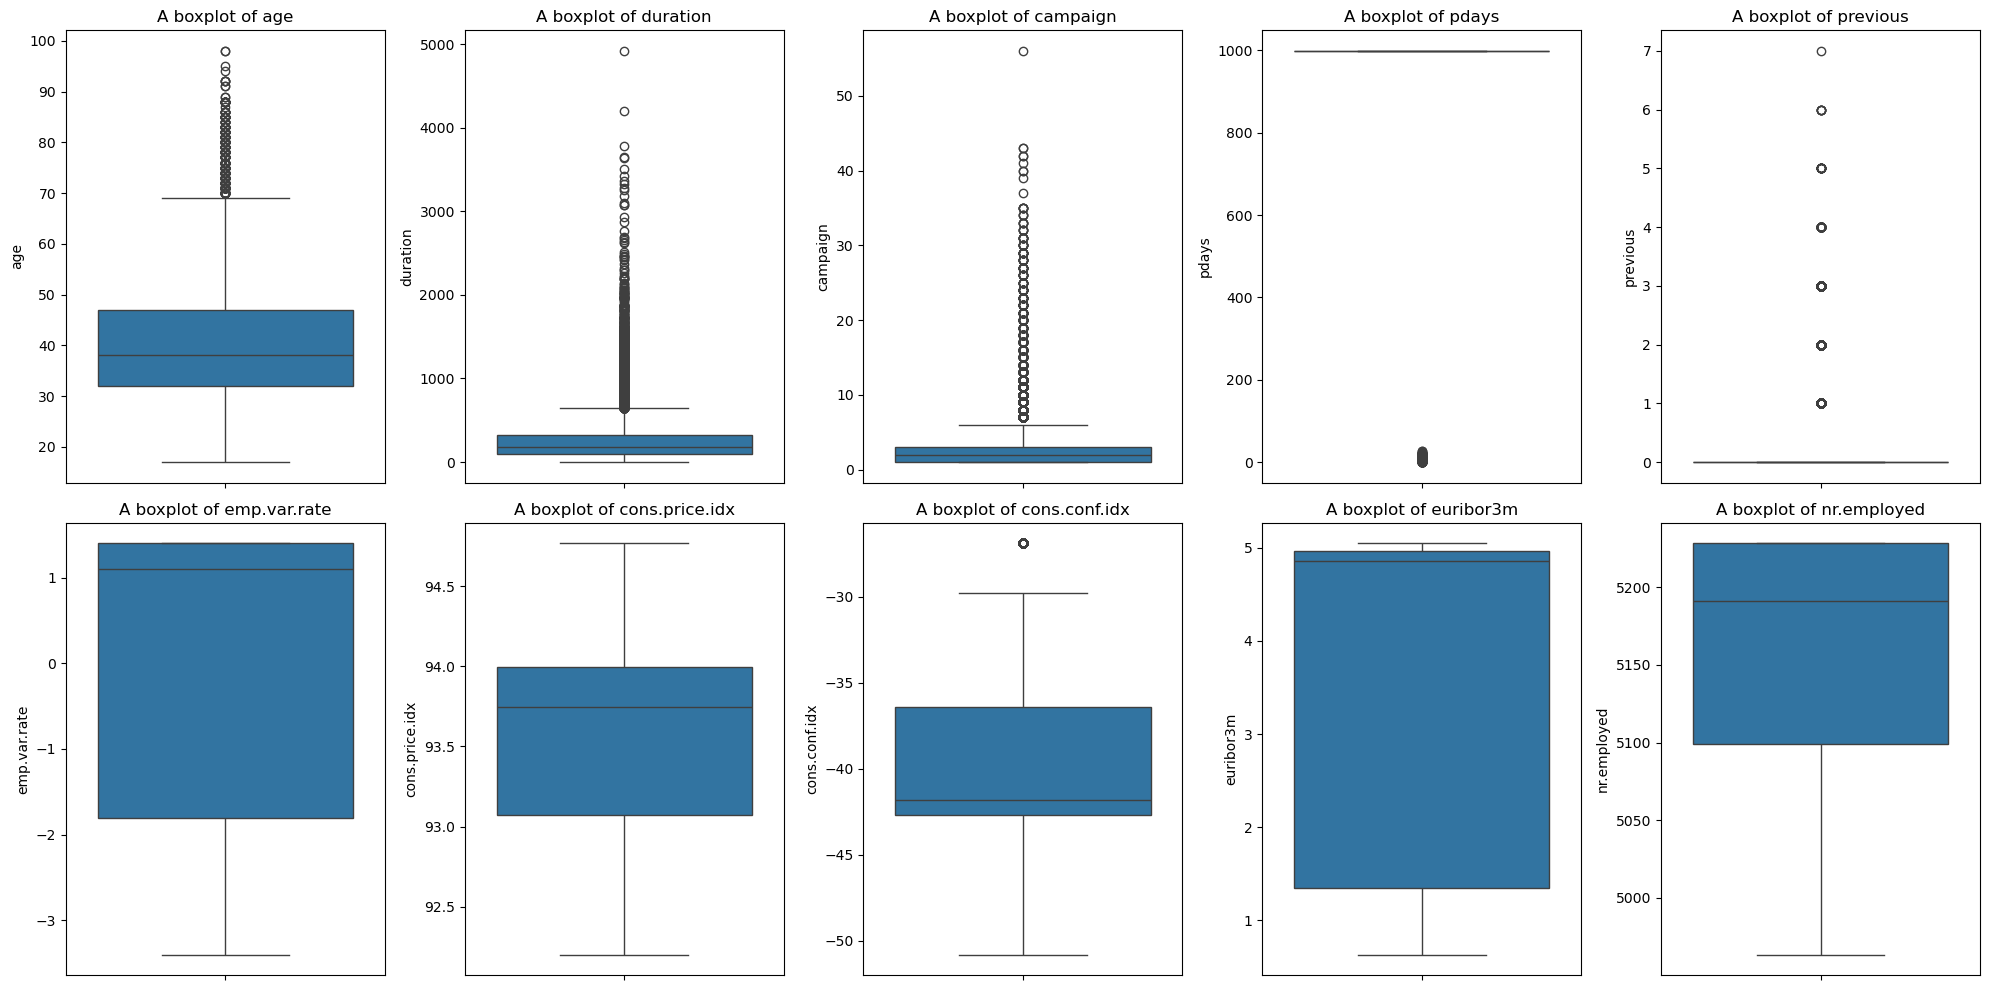

In [19]:
fig, axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(list_of_num_cols):
    sns.boxplot(data=df,y=column,ax =axes[i])
    axes[i].set_title(f'A boxplot of {column}')

plt.tight_layout()
plt.show()

In [20]:
def remove_outliers_columnwise(df, list_of_num_cols):
    cleaned_df = df.copy()
    
    for col in list_of_num_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Set outliers to NaN, keep all rows
        cleaned_df[col] = cleaned_df[col].where((cleaned_df[col] >= lower) & (cleaned_df[col] <= upper))
    
    return cleaned_df


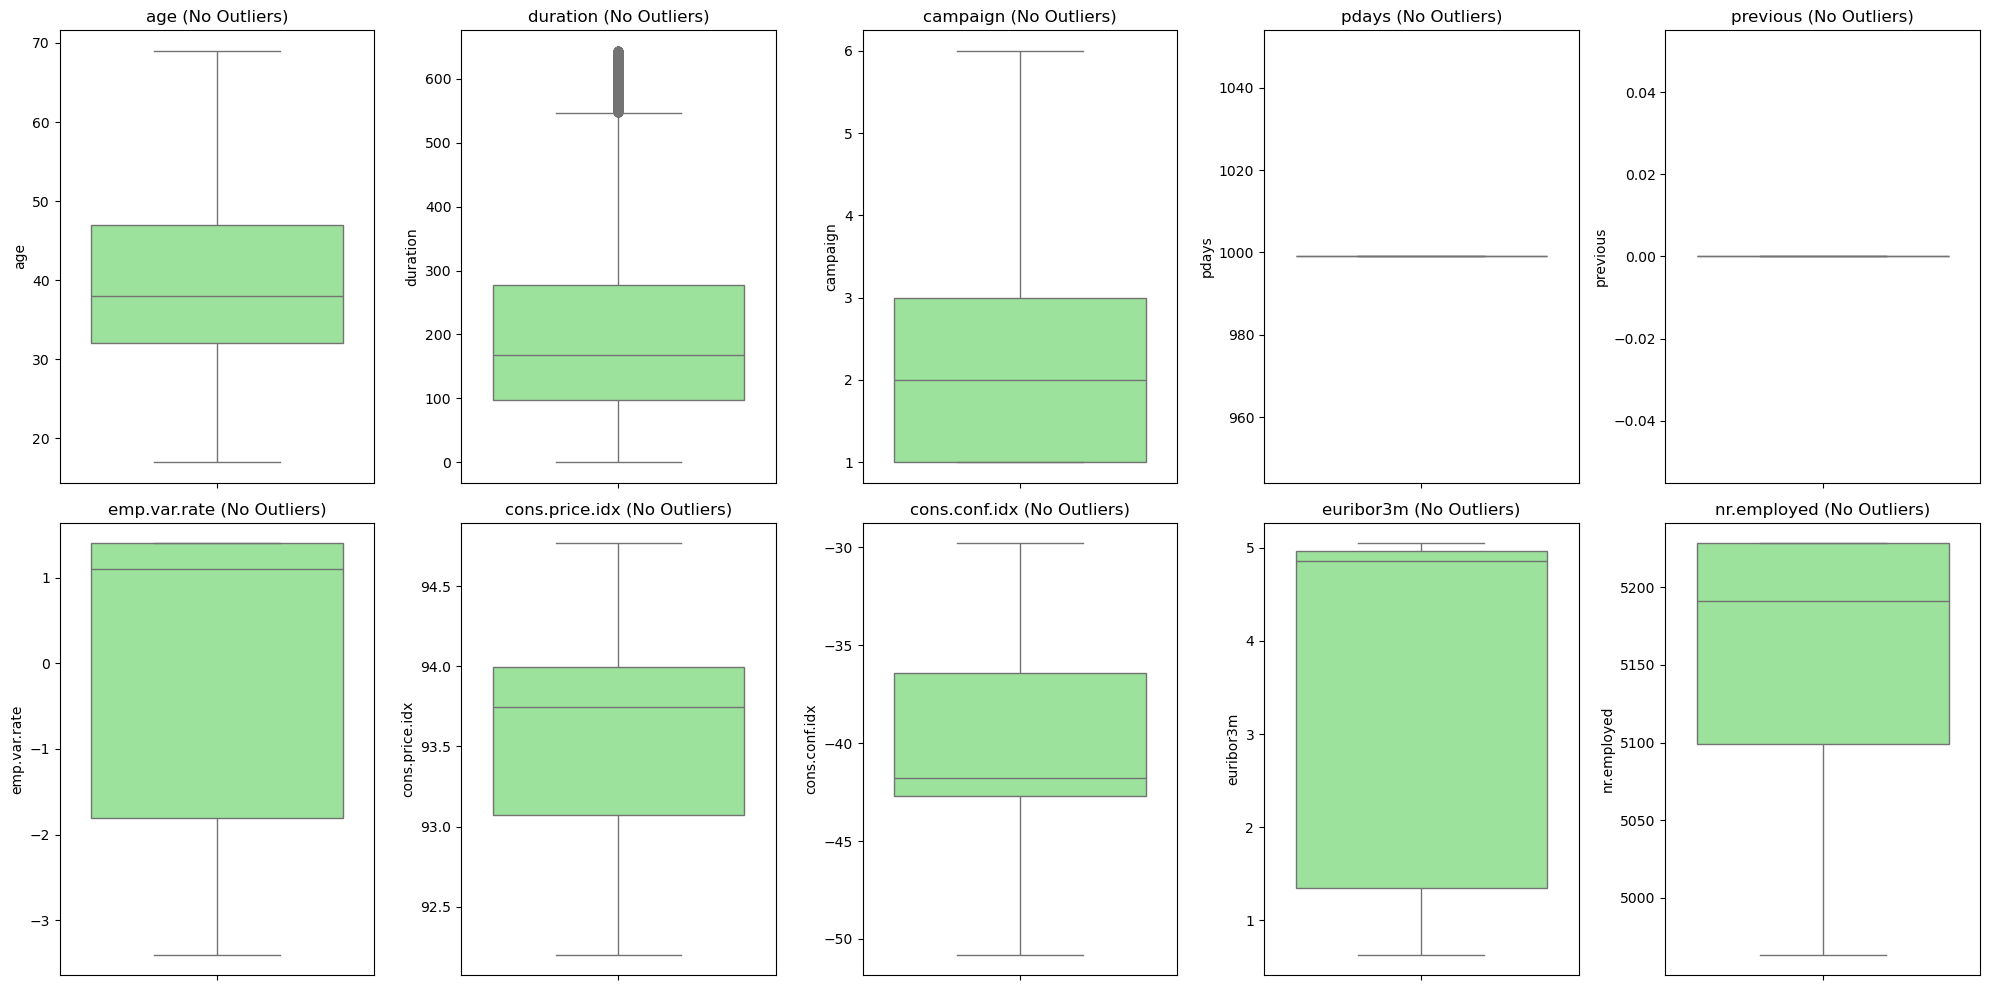

In [21]:
clean_df = remove_outliers_columnwise(df, list_of_num_cols)

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(list_of_num_cols):
    sns.boxplot(data=clean_df, y=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'{col} (No Outliers)')

plt.tight_layout()
plt.show()


In [22]:
categorical_columns = df.select_dtypes(include='O').drop('Suscribed',axis=1)
categorical_columns =categorical_columns.columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [23]:
for col in categorical_columns:
    print( col +'\n')
    cross_tab = pd.crosstab( df[col],columns=df['Suscribed'])
    significance_level = 0.05
    calculated_chi_statistic, p_value, dof, expected = stats.chi2_contingency(cross_tab.values,correction= False)
    
    Critical_value = stats.chi2.ppf(q=1-significance_level,df =dof)

    if calculated_chi_statistic > Critical_value:
        print('Reject Null Hypothesis')
    else:
        print('Fail to reject Null hypothesis' +'\n')

    if p_value <= significance_level:
        print('Reject Null Hypothesis ')
    else:
        print('Fail to reject Null hypothesis')
    

job

Reject Null Hypothesis
Reject Null Hypothesis 
marital

Reject Null Hypothesis
Reject Null Hypothesis 
education

Reject Null Hypothesis
Reject Null Hypothesis 
default

Reject Null Hypothesis
Reject Null Hypothesis 
housing

Fail to reject Null hypothesis

Fail to reject Null hypothesis
loan

Fail to reject Null hypothesis

Fail to reject Null hypothesis
contact

Reject Null Hypothesis
Reject Null Hypothesis 
month

Reject Null Hypothesis
Reject Null Hypothesis 
day_of_week

Reject Null Hypothesis
Reject Null Hypothesis 
poutcome

Reject Null Hypothesis
Reject Null Hypothesis 


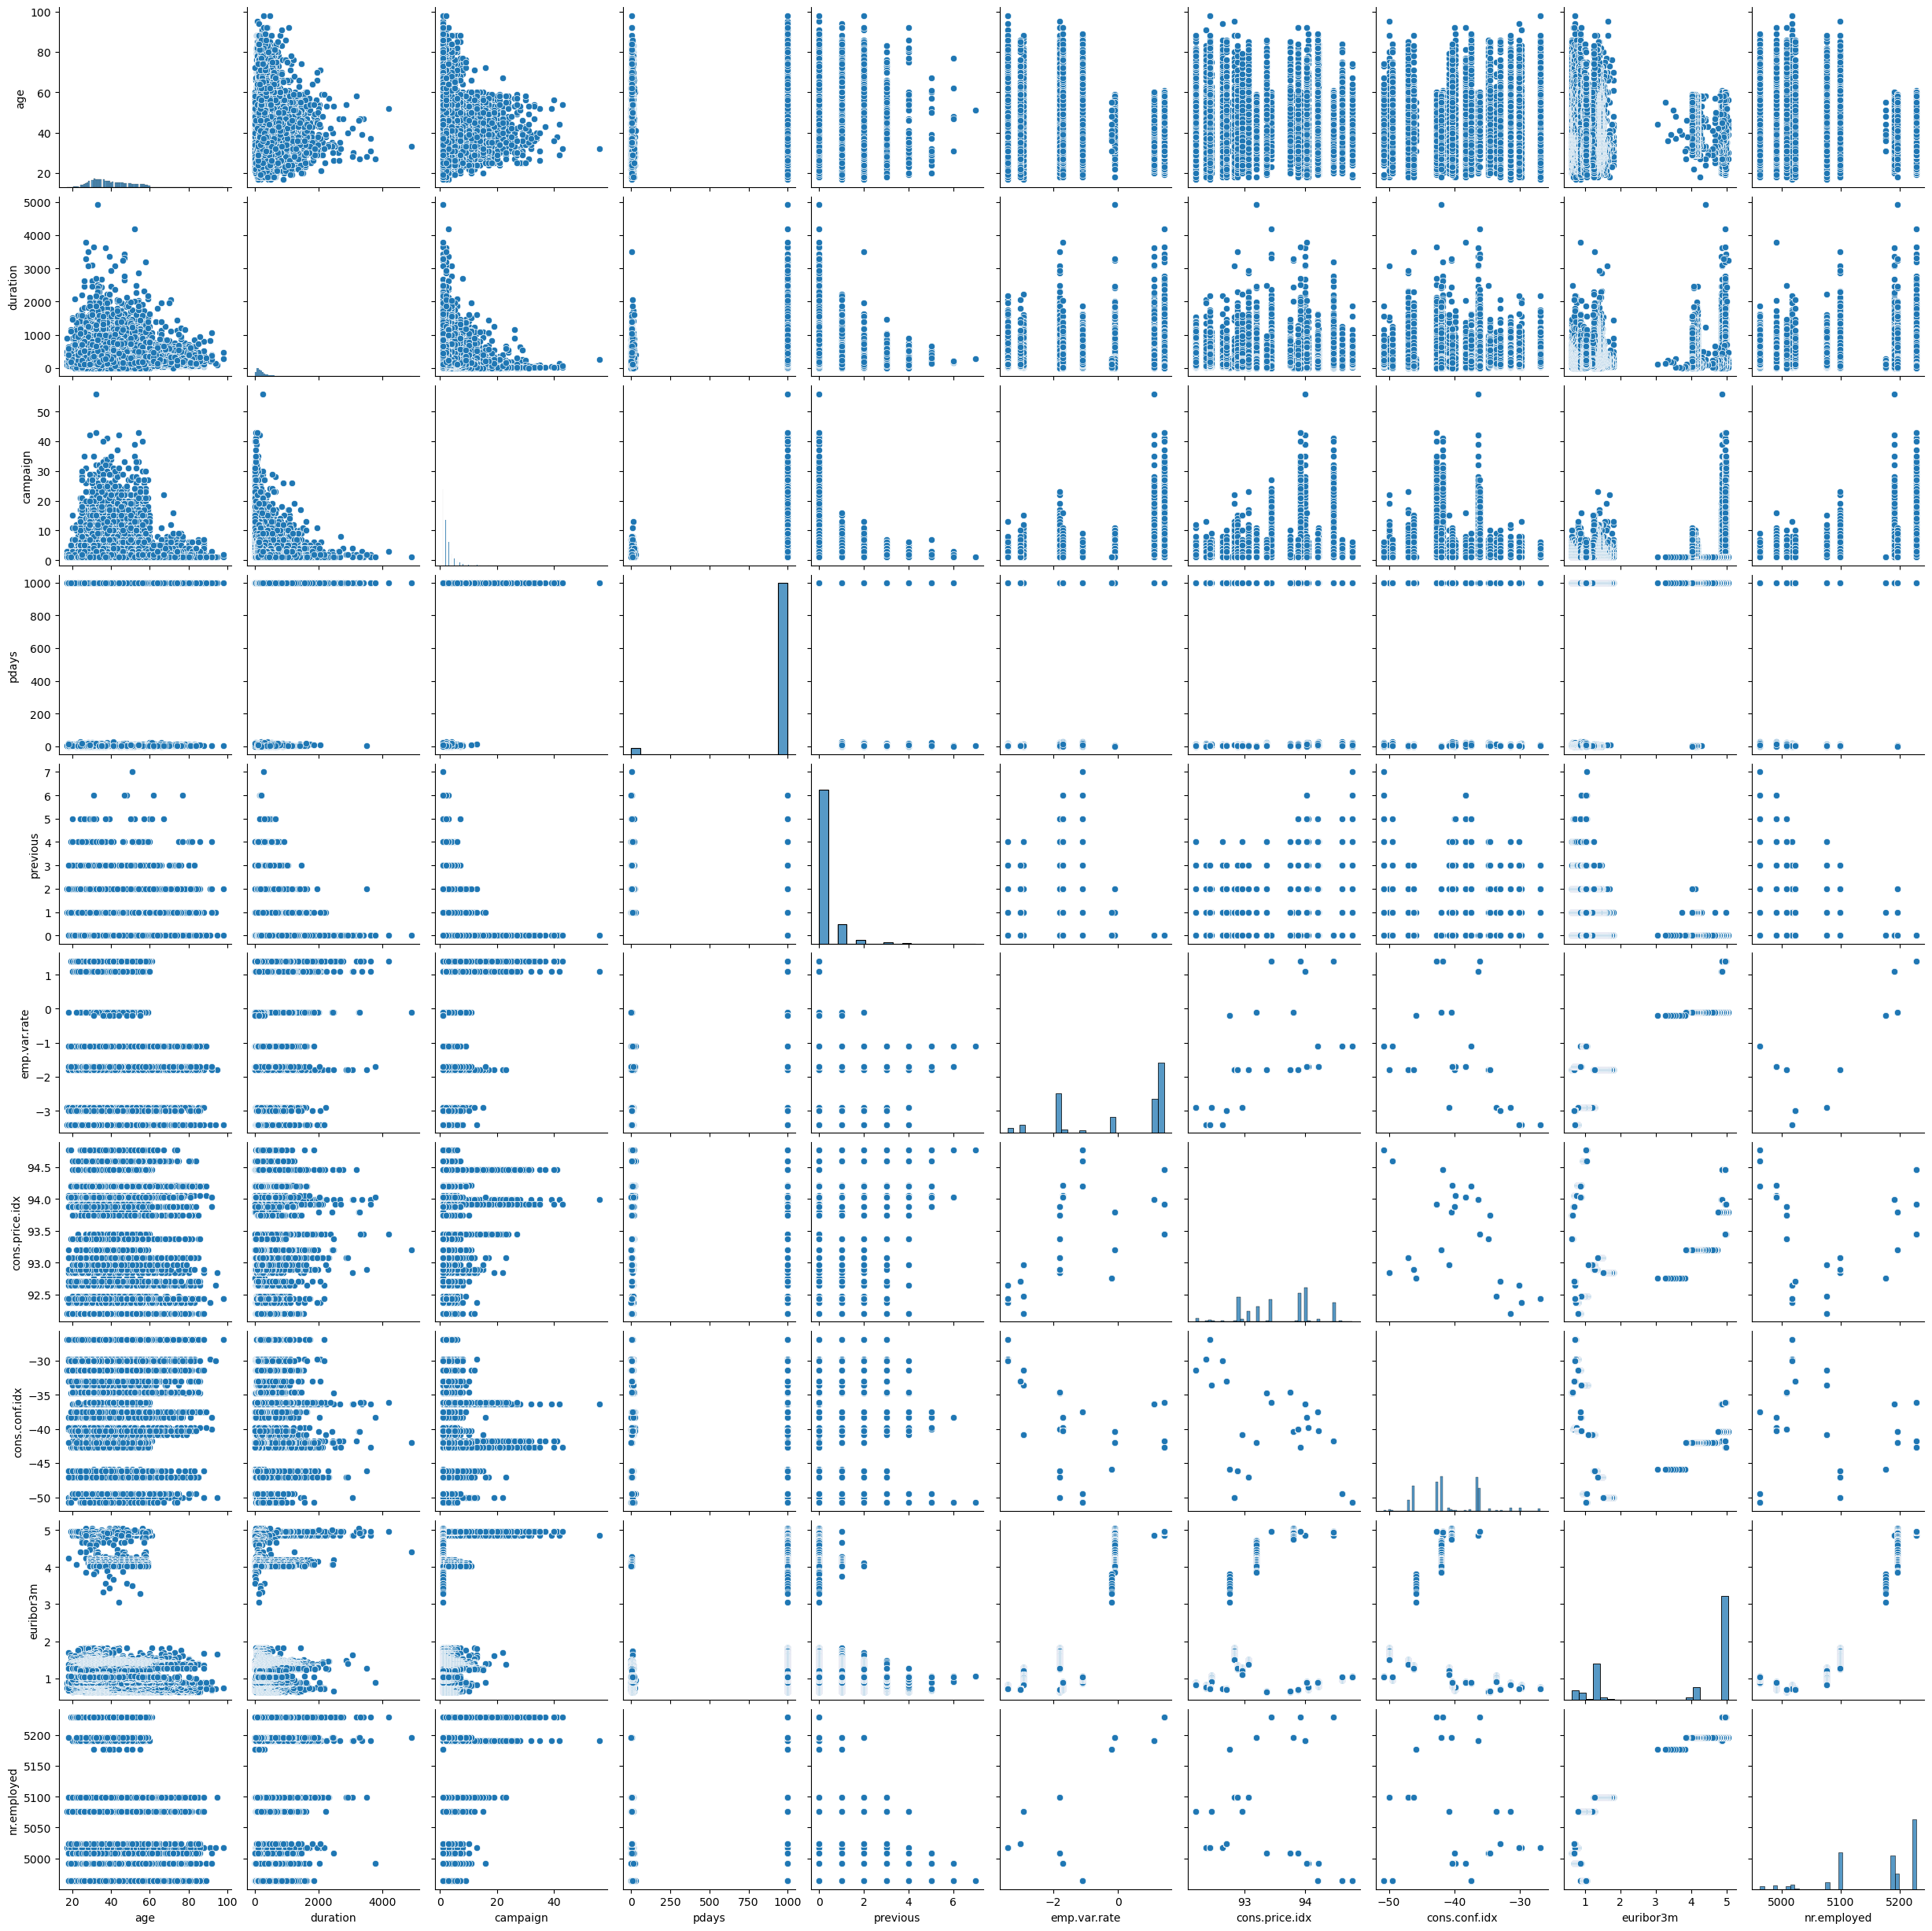

In [24]:
sns.pairplot(df)

In [25]:
corr_matrix =df.corr(numeric_only=True)

<Axes: >

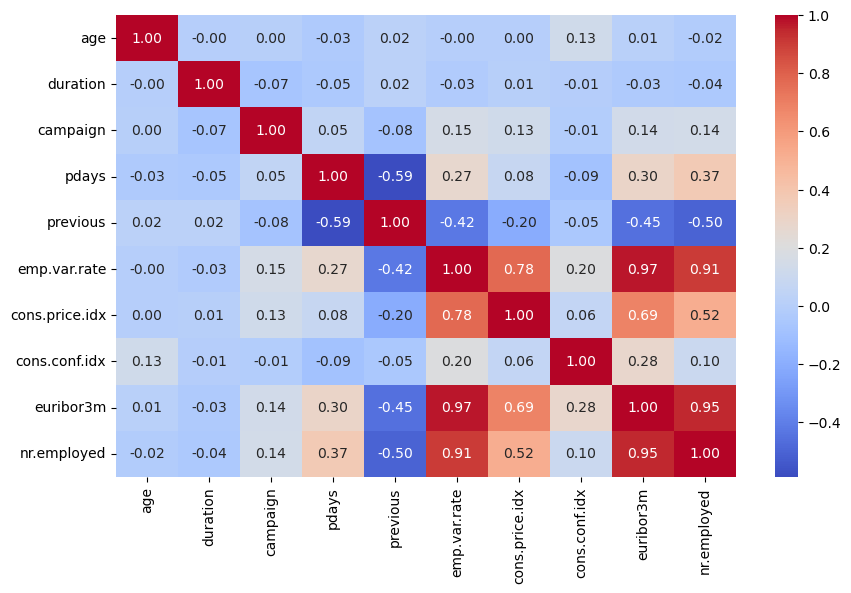

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,fmt='.2f',annot= True,cmap='coolwarm')

In [27]:
df.select_dtypes(include='number').skew()

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

In [28]:
df.select_dtypes(include='number').var()

age                 108.590569
duration          67239.249475
campaign              7.674664
pdays             34945.480000
previous              0.244990
emp.var.rate          2.467672
cons.price.idx        0.335055
cons.conf.idx        21.417088
euribor3m             3.008272
nr.employed        5220.259596
dtype: float64

<Axes: xlabel='count', ylabel='Suscribed'>

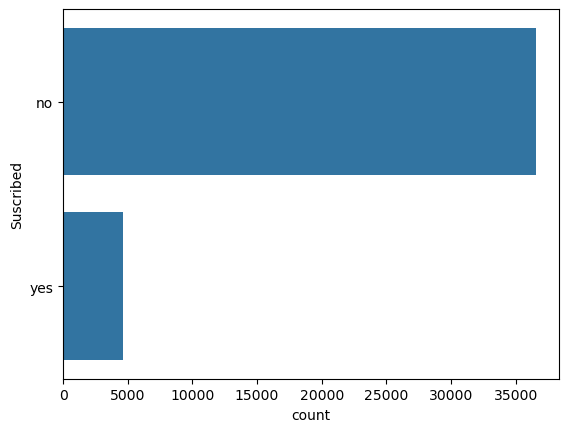

In [30]:
#lets explore distribution of target variable
sns.countplot(data= df['Suscribed'])

In [ ]:
# There is class imbalance with regards to the dataset

In [ ]:
'''
Subsetting the clients who subscribed  to further analyze why some people subscribed.
'''

In [31]:
yes_subscription =df[df['Suscribed']=='yes']

In [32]:
#finding the number of rows and columns in the subsetted dataframe
yes_subscription.shape

(4639, 21)

In [33]:
#finding the summary statistic for numeric columns
yes_subscription.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000
mean,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069
std,13.838838,401.190736,1.666353,403.439220,0.860406,1.623616,0.676592,6.139657,1.742717,87.581640
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.500000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.500000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [34]:
#finding the summary statistic for categorical variables
yes_subscription.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Suscribed
count,4639,4639,4639,4639,4639,4639,4639,4639,4639,4639,4639
unique,12,4,8,2,3,3,2,10,5,3,1
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,yes
freq,1351,2531,1669,4196,2507,3849,3852,886,1044,3140,4639


In [ ]:
'''There are 4639 rows of clients that subscribed out of 41176 
therefore '''

In [ ]:
''' Questions
1. Which month did people subscribe to the most (top 3) and least(bottom 3)
2. What is the education level of clients  who subscribed
3. Which days yield the best outcomes?
4. Did people who took a loan constitute a large portion of clients who subscribed
5. Which job types have the highest and lowest subscription rates?
6. Which contact method (cellular or telephone) results in higher subscription rates?
7. Are younger or older people more likely to subscribe?
Is there an optimal age range where the subscription probability peaks?
8. How do economic indicators impact campaign success?
9. How does call duration influence subscription, and what is the optimal length?
Use duration to determine if longer calls increase conversion.


'''

In [35]:
monthly_yes_subscription =yes_subscription.groupby('Suscribed')['month'].value_counts().reset_index()

In [36]:
monthly_yes_subscription

,Suscribed,month,count
0,yes,may,886
1,yes,aug,655
2,yes,jul,648
3,yes,jun,559
4,yes,apr,539
5,yes,nov,416
6,yes,oct,315
7,yes,mar,276
8,yes,sep,256
9,yes,dec,89


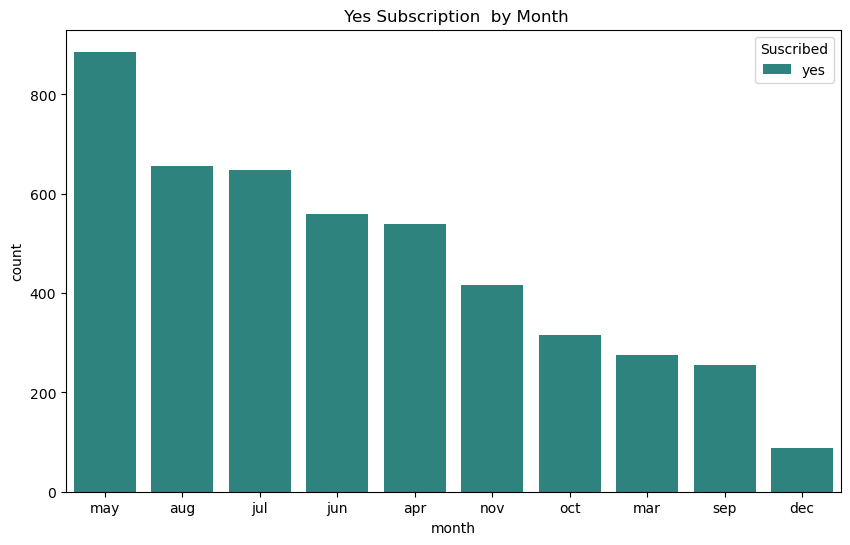

In [37]:
plt.figure(figsize=(10,6))
plt.title(' Yes Subscription  by Month')
sns.barplot(data=monthly_yes_subscription,x='month',y='count',hue='Suscribed',palette='viridis')
plt.show()

In [38]:
subscription_by_month = df.groupby('Suscribed')['month'].value_counts().reset_index()

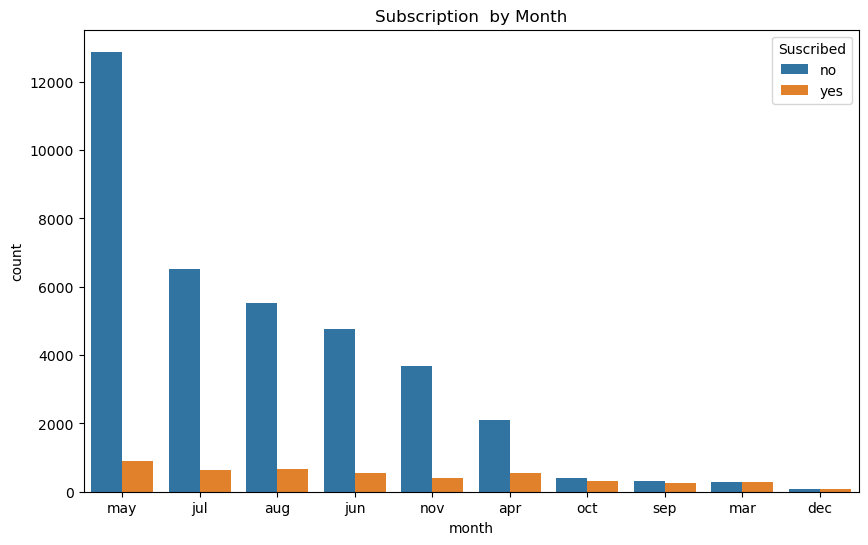

In [39]:
plt.figure(figsize=(10,6))
plt.title('Subscription  by Month')
sns.barplot(data=subscription_by_month,x='month',y='count',hue='Suscribed')
plt.show()

In [40]:
df['month'].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [ ]:
'''Most of the marketing campaigns were done in May, July, and August. 
So, even though these months had the highest subscriptions,
we can’t confidently say they are the best for marketing. 
Running the same number of campaigns in each month 
would help us see which months actually perform best''' 

In [ ]:
df.columns

In [41]:
day_of_week_count = df['day_of_week'].value_counts().reset_index().sort_values(by='count',ascending=False)

In [42]:
yes_day_subscription = yes_subscription['day_of_week'].value_counts().reset_index().sort_values(by='count',ascending=False)

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/211877902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_of_week_count, x='day_of_week', y='count', ax=axes[0],palette='coolwarm')
/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/211877902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yes_day_subscription, x='day_of_week', y='count', ax=axes[1],palette='winter')


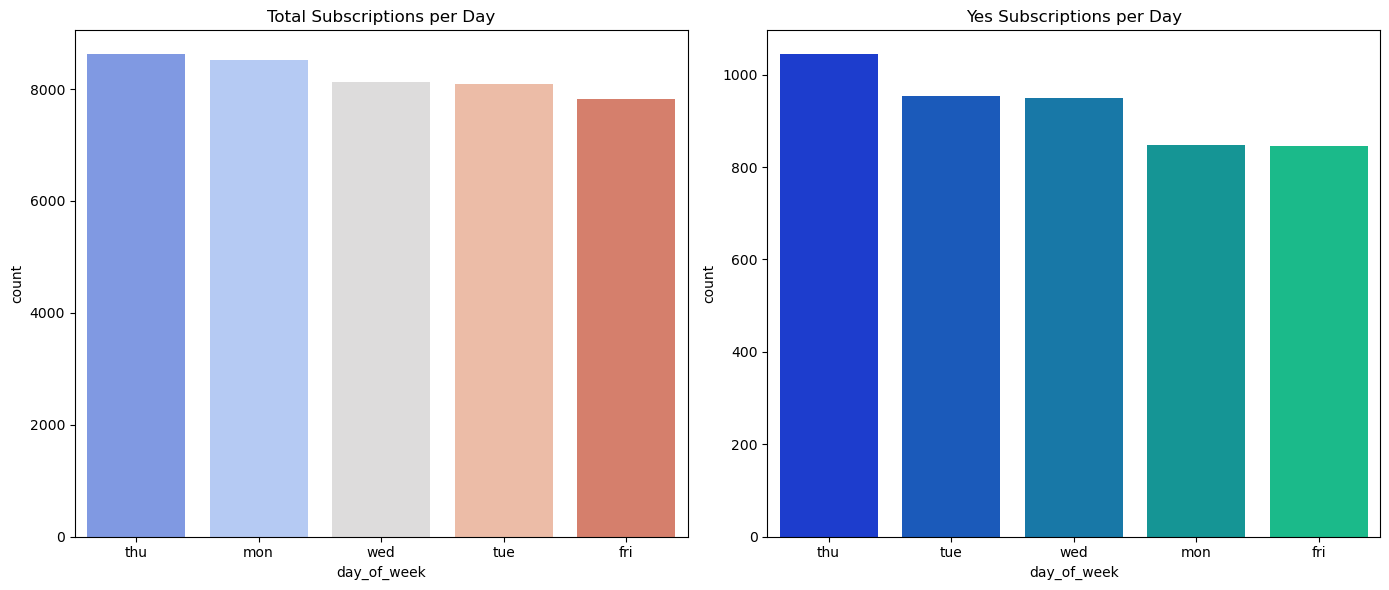

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

sns.barplot(data=day_of_week_count, x='day_of_week', y='count', ax=axes[0],palette='coolwarm')
axes[0].set_title("Total Subscriptions per Day")

sns.barplot(data=yes_day_subscription, x='day_of_week', y='count', ax=axes[1],palette='winter')
axes[1].set_title("Yes Subscriptions per Day")

plt.tight_layout()
plt.show()

In [ ]:
''' Note that the diagrams in both sections have been sorted . we realise in the 2nd diagram
tuesday had the second most subscriptions, we realise though the total number of days. 
the best day for marketing is tuesday. monday however performs poorly.'''

In [44]:
df['education'].value_counts().reset_index()

,education,count
0,university.degree,12164
1,high.school,9512
2,basic.9y,6045
3,professional.course,5240
4,basic.4y,4176
5,basic.6y,2291
6,unknown,1730
7,illiterate,18


In [45]:
education_by_subscription =yes_subscription['education'].value_counts().reset_index().sort_values(by='count',ascending = False)

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/3180258364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_by_subscription,x='education',y='count',palette='winter')


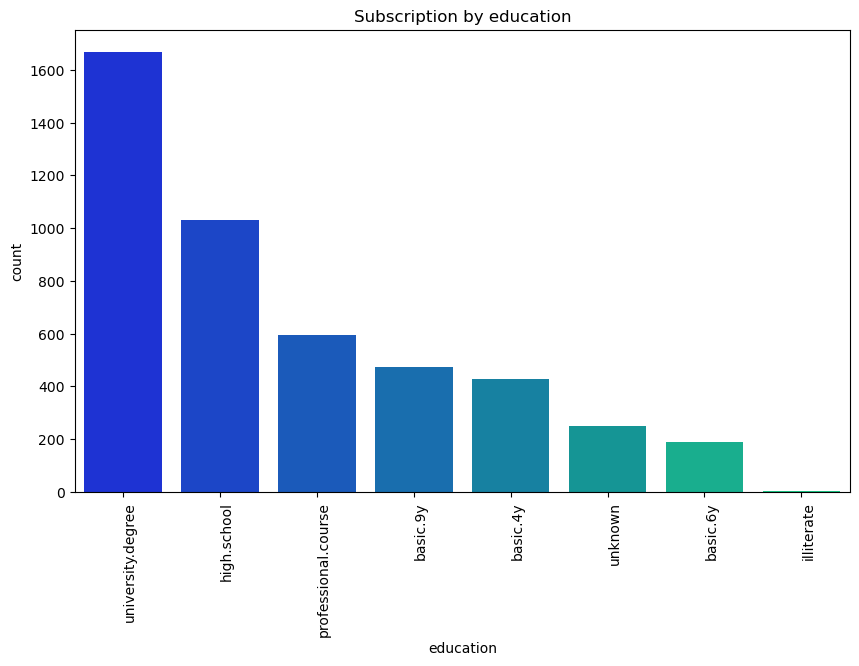

In [46]:

plt.figure(figsize=(10,6))
plt.title('Subscription by education')
sns.barplot(data=education_by_subscription,x='education',y='count',palette='winter')
plt.xticks(rotation= 90,ha='left')
plt.show()

In [ ]:
# people with low level of education are more likely to not subscribed

In [47]:
df['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [48]:
df.groupby('Suscribed')['loan'].value_counts()

Suscribed  loan   
no         no         30089
           yes         5565
           unknown      883
yes        no          3849
           yes          683
           unknown      107
Name: count, dtype: int64

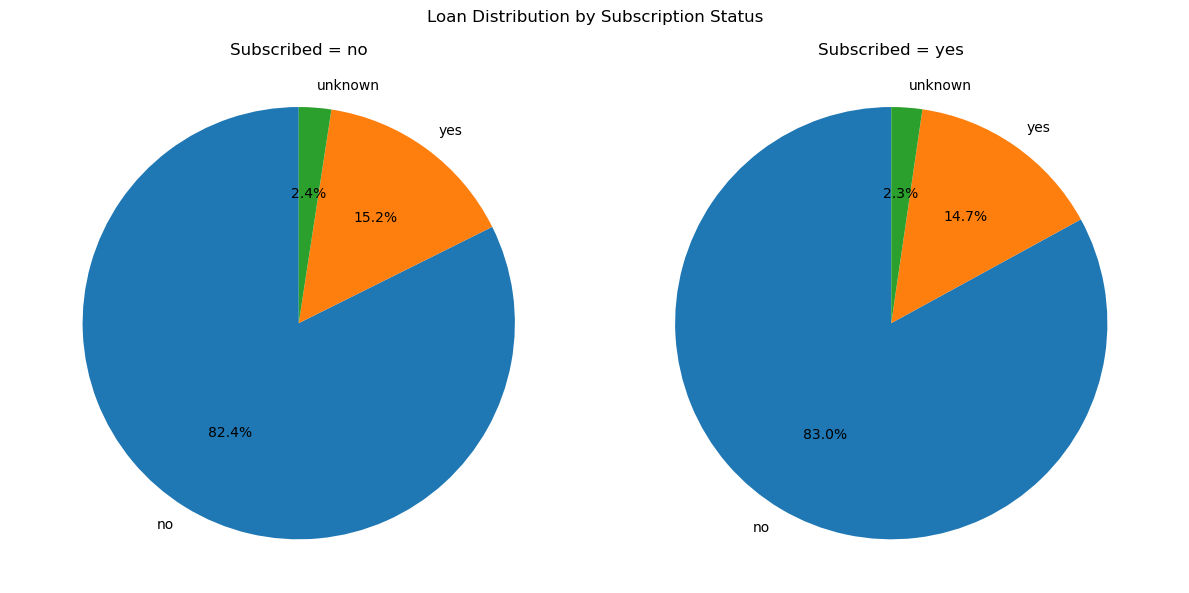

In [49]:

grouped = df.groupby('Suscribed')['loan'].value_counts()

# Extract data for each 'Subscribed' group
no_data = grouped['no']
yes_data = grouped['yes']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Subscribed = no
axes[0].pie(no_data, labels=no_data.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Subscribed = no')
axes[0].axis('equal')

# Plot for Subscribed = yes
axes[1].pie(yes_data, labels=yes_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Subscribed = yes')
axes[1].axis('equal')

plt.suptitle('Loan Distribution by Subscription Status')
plt.tight_layout()
plt.show()


In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Suscribed'],
      dtype='object')

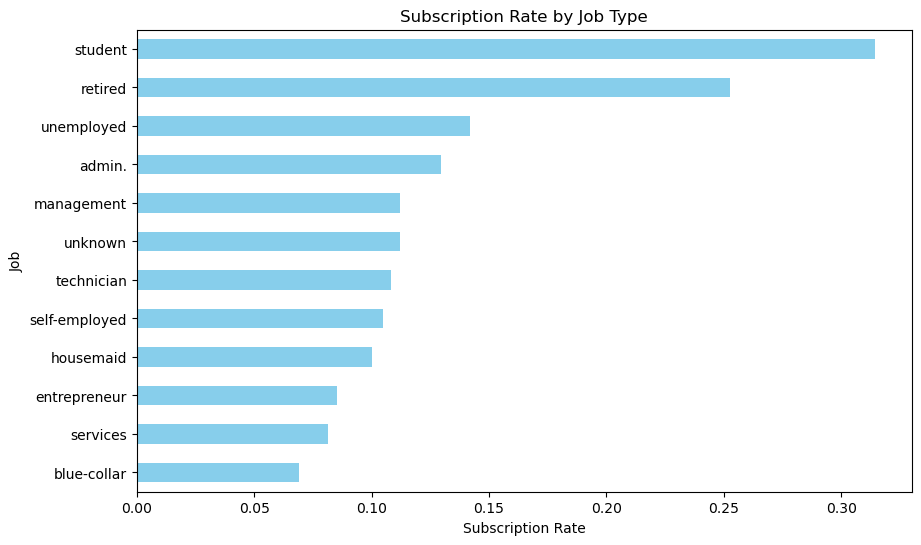

In [51]:
job_subscription = df.groupby('job')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Plot
job_subscription['yes'].sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Subscription Rate')
plt.ylabel('Job')
plt.show()

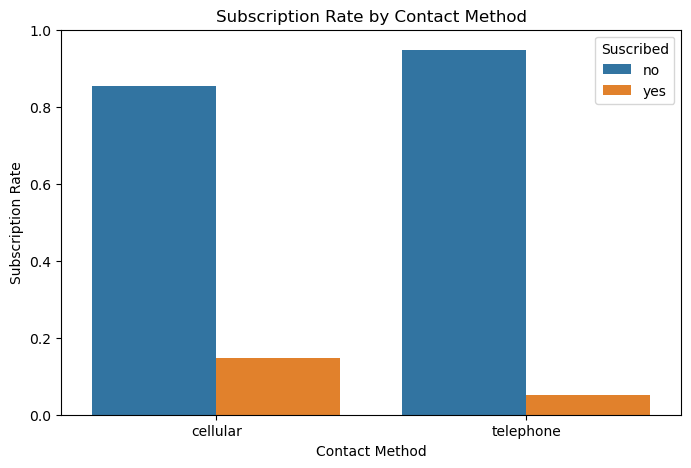

In [52]:
contact_counts = df.groupby(['contact', 'Suscribed']).size().reset_index(name='count')

# Calculate percentages within each contact group
contact_counts['percent'] = contact_counts.groupby('contact')['count'].transform(lambda x: x / x.sum())

# Plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(data=contact_counts, x='contact', y='percent', hue='Suscribed')
plt.title('Subscription Rate by Contact Method')
plt.ylabel('Subscription Rate')
plt.xlabel('Contact Method')
plt.ylim(0, 1)
plt.show()

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/3700124490.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = df.groupby('age_group')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)


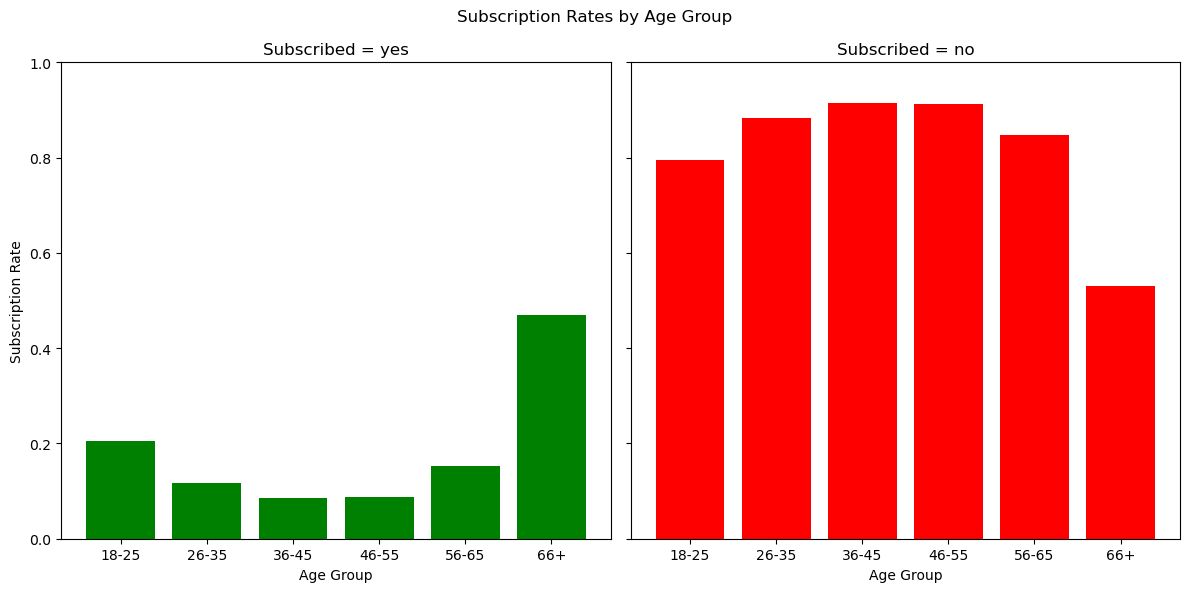

In [53]:
# Bin age into groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 90], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Compute subscription rate per age group
age_rate = df.groupby('age_group')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Subscribed = yes
axes[0].bar(age_rate.index, age_rate['yes'], color='green')
axes[0].set_title('Subscribed = yes')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Subscription Rate')
axes[0].set_ylim(0, 1)

# Subscribed = no
axes[1].bar(age_rate.index, age_rate['no'], color='red')
axes[1].set_title('Subscribed = no')
axes[1].set_xlabel('Age Group')
axes[1].set_ylim(0, 1)

plt.suptitle('Subscription Rates by Age Group')
plt.tight_layout()
plt.show()

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/3944030891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_duration, x='Suscribed', y='duration', palette='Set2')


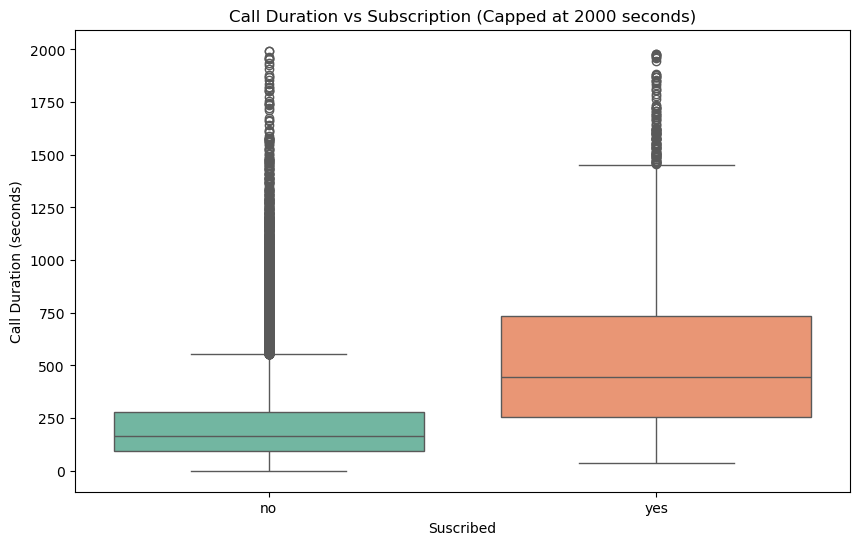

In [54]:
# Limit duration to 2000 seconds to remove extreme outliers
df_duration = df[df['duration'] < 2000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_duration, x='Suscribed', y='duration', palette='Set2')
plt.title('Call Duration vs Subscription (Capped at 2000 seconds)')
plt.ylabel('Call Duration (seconds)')
plt.show()

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_50821/2435013370.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_rate = df.groupby('duration_bin')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)


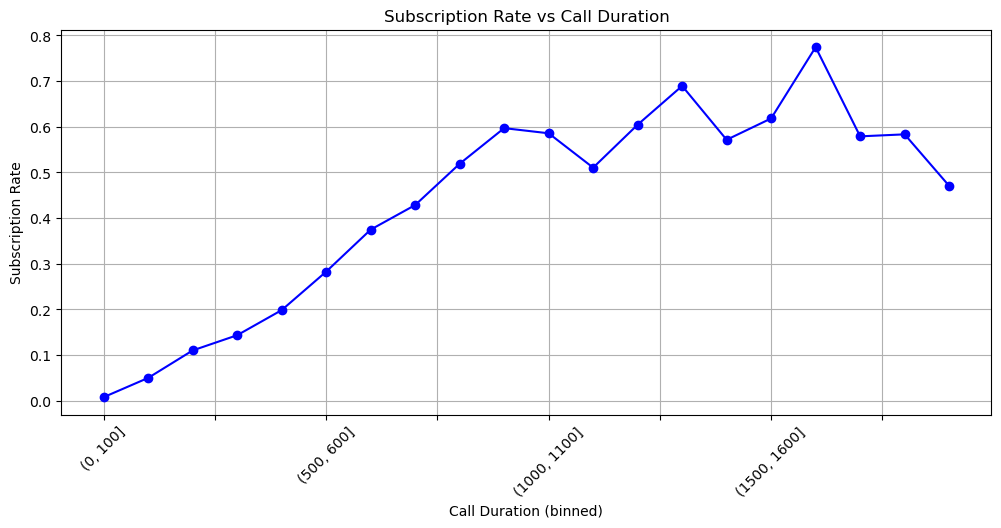

In [55]:
# Bin duration into intervals (e.g., 0–100, 100–200, etc.)
df['duration_bin'] = pd.cut(df['duration'], bins=range(0, 2100, 100))

# Compute subscription rate for each bin
duration_rate = df.groupby('duration_bin')['Suscribed'].value_counts(normalize=True).unstack().fillna(0)

# Plot the 'yes' subscription rate by duration bin
plt.figure(figsize=(12, 5))
duration_rate['yes'].plot(kind='line', marker='o', color='blue')
plt.title('Subscription Rate vs Call Duration')
plt.xlabel('Call Duration (binned)')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [56]:
for col in object_cols:
    print(col)
    print(df[col].nunique())

job
12
marital
4
education
8
default
3
housing
3
loan
3
contact
2
month
10
day_of_week
5
poutcome
3
Suscribed
2


In [59]:
df['Suscribed'].unique()


array(['no', 'yes'], dtype=object)

In [60]:
# Convert target to numeric
df['Suscribed'] = df['Suscribed'].map({'no': 0, 'yes': 1})


In [61]:
# Install category_encoders if not installed:
# pip install category_encoders

#import category_encoders as ce

# Define encoder
target_enc = ce.TargetEncoder(cols=['job', 'education'])

# Fit and transform
df[['job', 'education']] = target_enc.fit_transform(df[['job', 'education']], df['Suscribed'])


/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/category_encoders/ordinal.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [63]:
low_card_cols = ['marital', 'default', 'housing', 'loan', 'poutcome', 'day_of_week']
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)


In [64]:
df.columns

Index(['age', 'job', 'education', 'contact', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'Suscribed', 'age_group', 'duration_bin',
       'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'poutcome_nonexistent', 'poutcome_success',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [71]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Suscribed','age_group','duration_bin'],inplace=True)
y = df['Suscribed']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X.isna().sum()



KeyError: 'Suscribed'